<a href="https://colab.research.google.com/github/unrebby/data/blob/main/homework_practice_05_trees_Antonova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Машинное обучение, ФКН ВШЭ

## Практическое задание 5. Решающие деревья

### Общая информация
Дата выдачи: 18.11.2022

Мягий дедлайн: 23:59MSK 30.11.2022

Жестокий дедлайн: 23:59MSK 06.12.2022

### О задании

Задание состоит из двух разделов:
1. В первом разделе вы научитесь применять деревья из sklearn для задачи классификации. Вы посмотрите какие разделяющие поверхности деревья строят для различных датасетов и проанализируете их зависимость от различных гиперпараметров.
2. Во втором разделе вы попробуете реализовать свое решающее дерево и сравните его со стандартное имплиментацией из sklearn. Вы также протестируете деревья на более сложных датасетах и сравните различные подходы к кодированию категориальных признаков.

### Оценивание и штрафы
Каждая из задач имеет определенную «стоимость» (указана в скобках около задачи). Максимально допустимая оценка за работу — 10 баллов.

Сдавать задание после указанного срока сдачи нельзя. При выставлении неполного балла за задание в связи с наличием ошибок на усмотрение проверяющего предусмотрена возможность исправить работу на указанных в ответном письме условиях.

Задание выполняется самостоятельно. «Похожие» решения считаются плагиатом и все задействованные студенты (в том числе те, у кого списали) не могут получить за него больше 0 баллов (подробнее о плагиате см. на странице курса). Если вы нашли решение какого-то из заданий (или его часть) в открытом источнике, необходимо указать ссылку на этот источник в отдельном блоке в конце вашей работы (скорее всего вы будете не единственным, кто это нашел, поэтому чтобы исключить подозрение в плагиате, необходима ссылка на источник).

Неэффективная реализация кода может негативно отразиться на оценке.


### Формат сдачи
Задания сдаются через систему anytask. Посылка должна содержать:
* Ноутбук homework-practice-05-trees-Username.ipynb
* Модуль hw5code.py
* Ссылки на посылки в Яндекс.Контесте для обеих задач

В контест https://contest.yandex.ru/contest/43413/problems/ нужно отправить файл hw5code.py с реализованными функциями и классами.

Username — ваша фамилия и имя на латинице именно в таком порядке

Для удобства проверки самостоятельно посчитайте свою максимальную оценку (исходя из набора решенных задач) и укажите ниже:

__Оценка:__ 10.

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import Colormap, ListedColormap
import pandas as pd
from sklearn.model_selection import train_test_split
import seaborn as sns
sns.set(style='whitegrid')
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

# 1. Решающие деревья. Визуализация.

В этой части мы рассмотрим два простых двумерных датасета сделанных с помощью `make_moons`, `make_circles` и посмотрим как ведет себя разделяющая поверхность в зависимости от различных гиперпараметров.

In [49]:
from sklearn.datasets import make_moons, make_circles, make_classification
datasets = [
    make_circles(noise=0.2, factor=0.5, random_state=42),
    make_moons(noise=0.2, random_state=42),
    make_classification(n_classes=3, n_clusters_per_class=1, n_features=2, class_sep=.8, random_state=3,
                        n_redundant=0., )
]

In [50]:
palette = sns.color_palette(n_colors=3)
cmap = ListedColormap(palette)

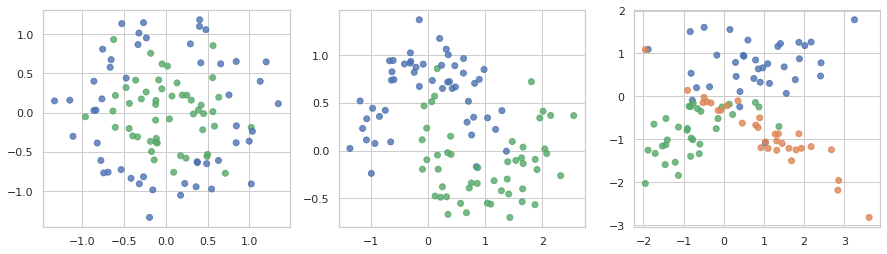

In [51]:
plt.figure(figsize=(15, 4))
for i, (x, y) in enumerate(datasets):
    plt.subplot(1, 3, i + 1)
    plt.scatter(x[:, 0], x[:, 1], c=y, cmap=cmap, alpha=.8)

__Задание 1. (1 балл)__

Для каждого датасета обучите решающее дерево с параметрами по умолчанию, предварительно разбив выборку на обучающую и тестовую. Постройте разделящие поверхности (для этого воспользуйтесь функцией `plot_surface`, пример ниже). Посчитайте accuracy на обучающей и тестовой выборках. Сильно ли деревья переобучились?

In [52]:
def plot_surface(clf, X, y):
    plot_step = 0.01
    palette = sns.color_palette(n_colors=len(np.unique(y)))
    cmap = ListedColormap(palette)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=cmap, alpha=0.3)

    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap, alpha=.7,
                edgecolors=np.array(palette)[y], linewidths=2)

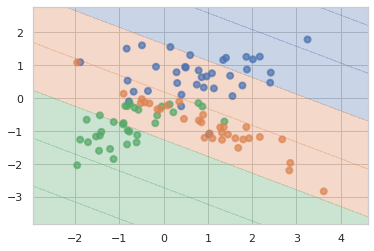

In [53]:
# Пример:
from sklearn.linear_model import LinearRegression
X, y = datasets[2]
lr  = LinearRegression().fit(X, y)
plot_surface(lr, X, y)

num of dataset: 1
train accuracy: 1.0
test accuracy: 0.7

num of dataset: 2
train accuracy: 1.0
test accuracy: 0.8666666666666667

num of dataset: 3
train accuracy: 1.0
test accuracy: 0.8



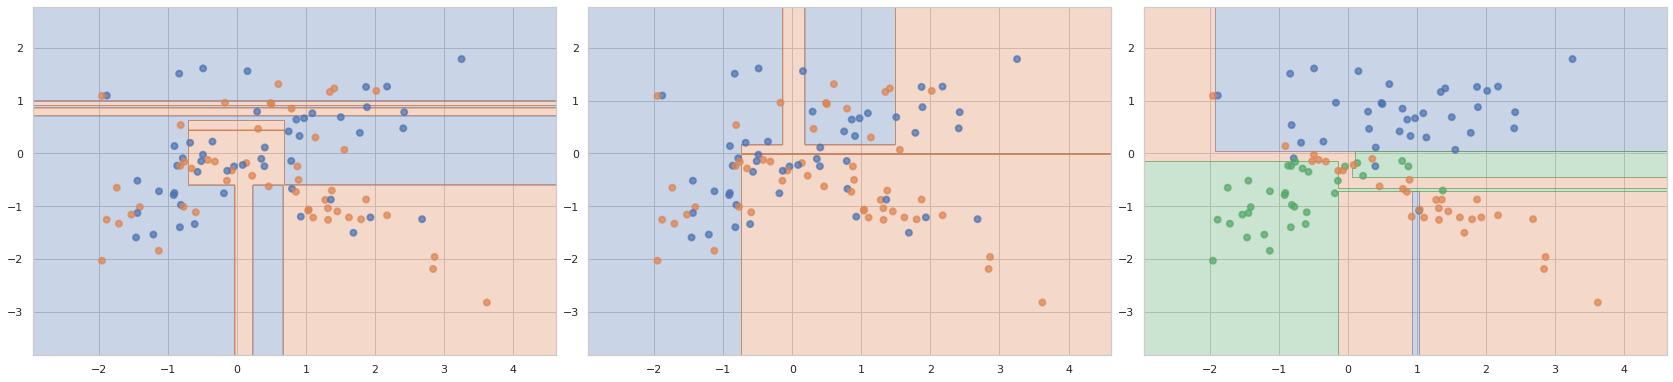

In [54]:
plt.figure(figsize=(24, 6))
for i, (x, y) in enumerate(datasets):
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)
    tr  = DecisionTreeClassifier().fit(X_train, y_train)
    plt.subplot(1, 3, i + 1)
    plot_surface(tr, X, y)

    print('num of dataset:', i + 1)
    print('train accuracy:', accuracy_score(y_train, tr.predict(X_train)))
    print('test accuracy:', accuracy_score(y_test, tr.predict(X_test)))
    print('')

__Ответ:__ деревья сильно переобучились: accuracy на трейне получился равным 1, а на тестовой ниже + очень сложно построены поверхности классов, а значит, алгоритм подстраивается под трейн.

__Задание 2. (1.5 балла)__

Попробуйте перебрать несколько параметров для регуляризации (напр. `max_depth`, `min_samples_leaf`). Для каждого набора гиперпараметров постройте разделяющую поверхность, выведите обучающую и тестовую ошибки. Можно делать кросс-валидацию или просто разбиение на трейн и тест, главное делайте каждый раз одинаковое разбиение, чтобы можно было корректно сравнивать (помните же, что итоговое дерево сильно зависит от небольшого изменения обучающей выборки?). Проследите как меняется разделяющая поверхность и обобщающая способность. Почему так происходит, одинаково ли изменение для разных датасетов?

max_depth: None
min_samples_leaf: 1 

num of dataset: 1
train accuracy: 1.0
test accuracy: 0.7 

num of dataset: 2
train accuracy: 1.0
test accuracy: 0.95 

num of dataset: 3
train accuracy: 1.0
test accuracy: 0.7 



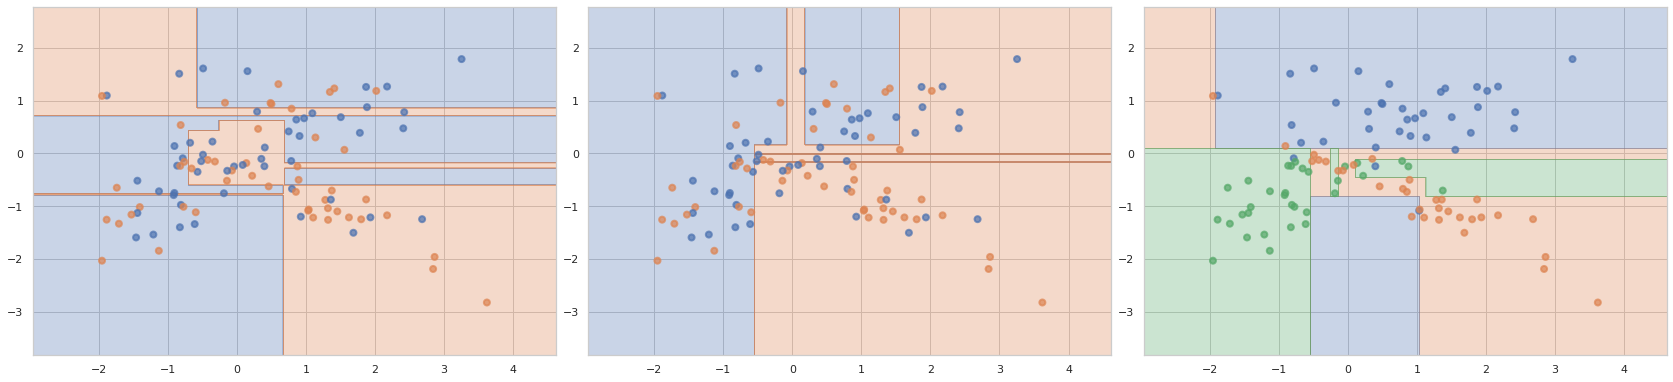

max_depth: None
min_samples_leaf: 5 

num of dataset: 1
train accuracy: 0.9125
test accuracy: 0.85 

num of dataset: 2
train accuracy: 0.95
test accuracy: 0.8 

num of dataset: 3
train accuracy: 0.9
test accuracy: 0.7 



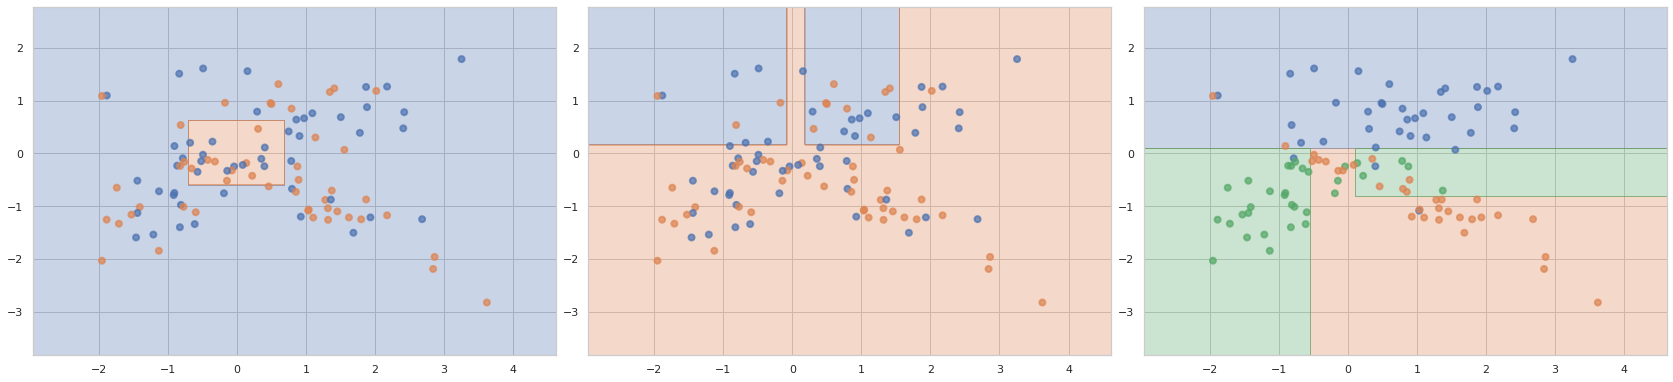

max_depth: None
min_samples_leaf: 10 

num of dataset: 1
train accuracy: 0.825
test accuracy: 0.9 

num of dataset: 2
train accuracy: 0.8375
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



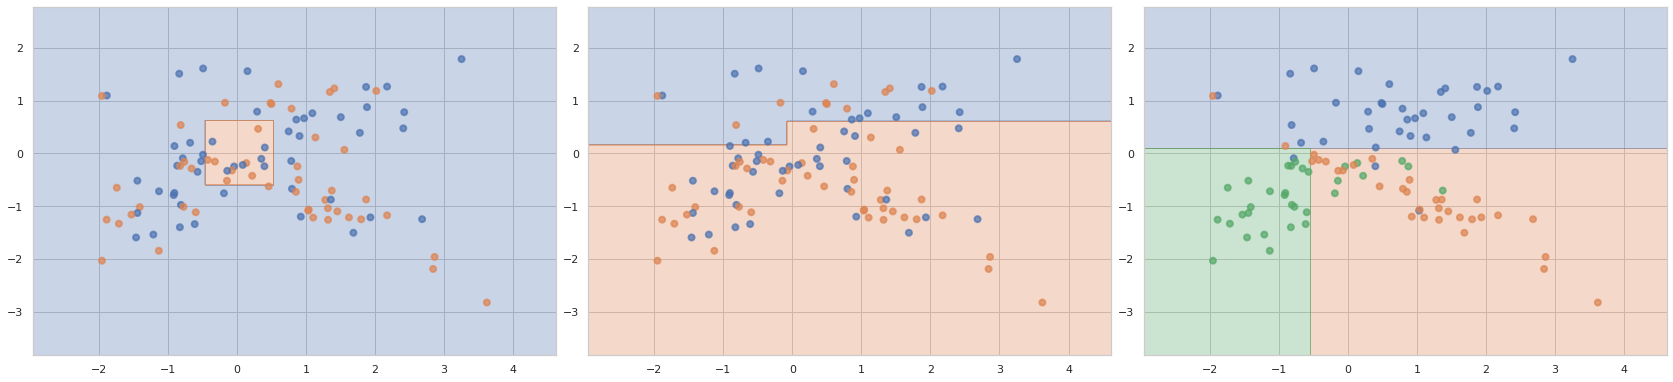

max_depth: None
min_samples_leaf: 15 

num of dataset: 1
train accuracy: 0.7875
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



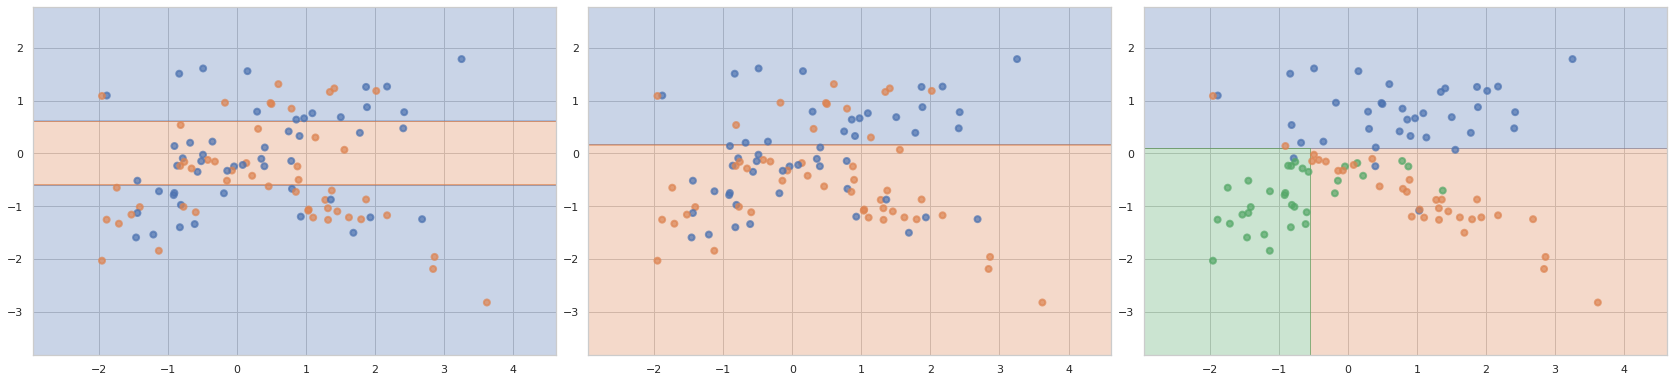

max_depth: 2
min_samples_leaf: 1 

num of dataset: 1
train accuracy: 0.8125
test accuracy: 0.6 

num of dataset: 2
train accuracy: 0.9125
test accuracy: 1.0 

num of dataset: 3
train accuracy: 0.9
test accuracy: 0.75 



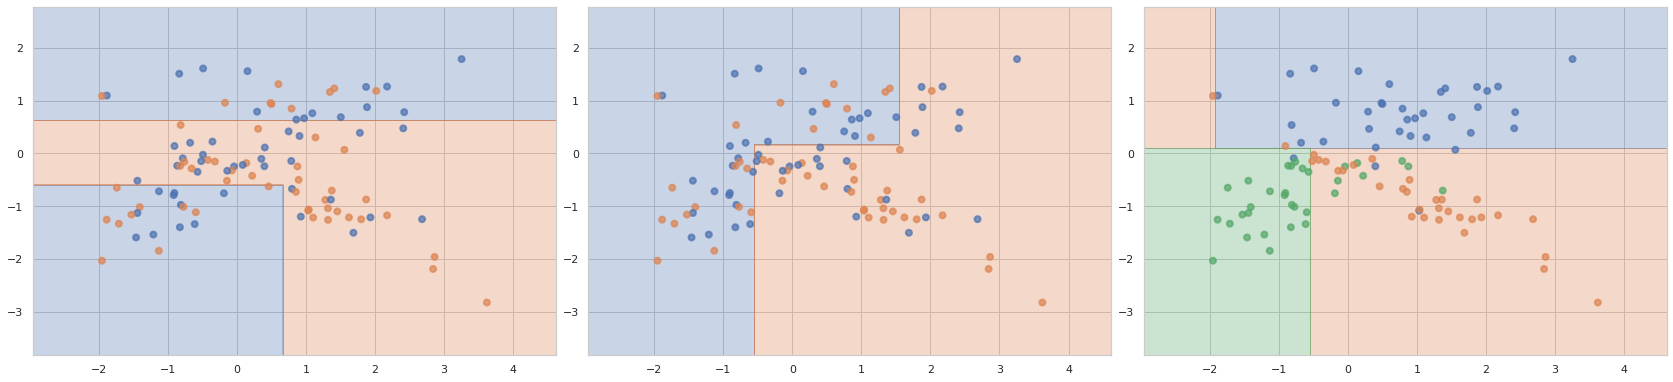

max_depth: 2
min_samples_leaf: 5 

num of dataset: 1
train accuracy: 0.8
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.8875
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



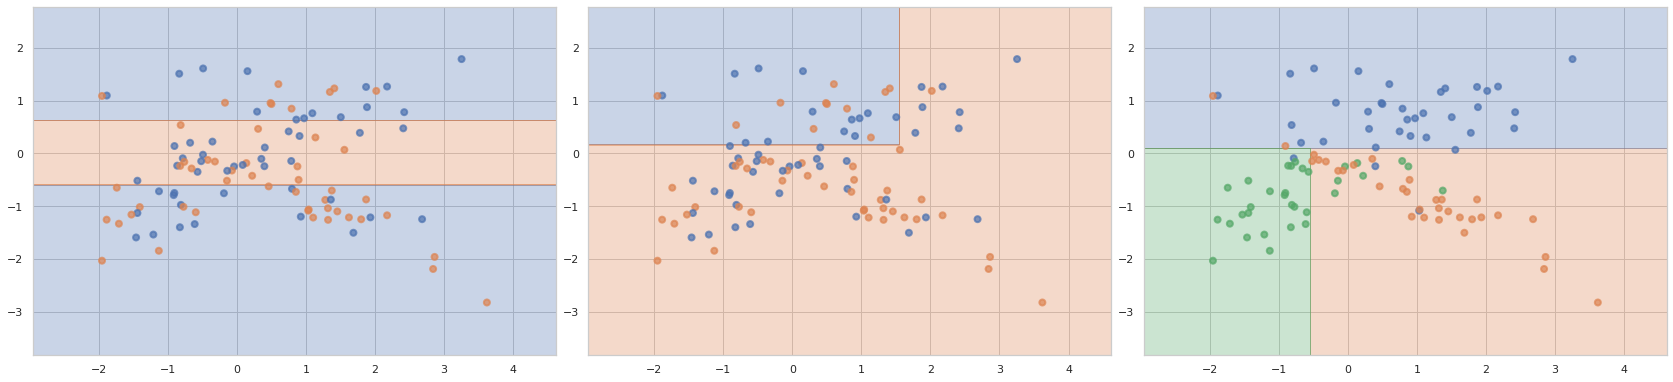

max_depth: 2
min_samples_leaf: 10 

num of dataset: 1
train accuracy: 0.8
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



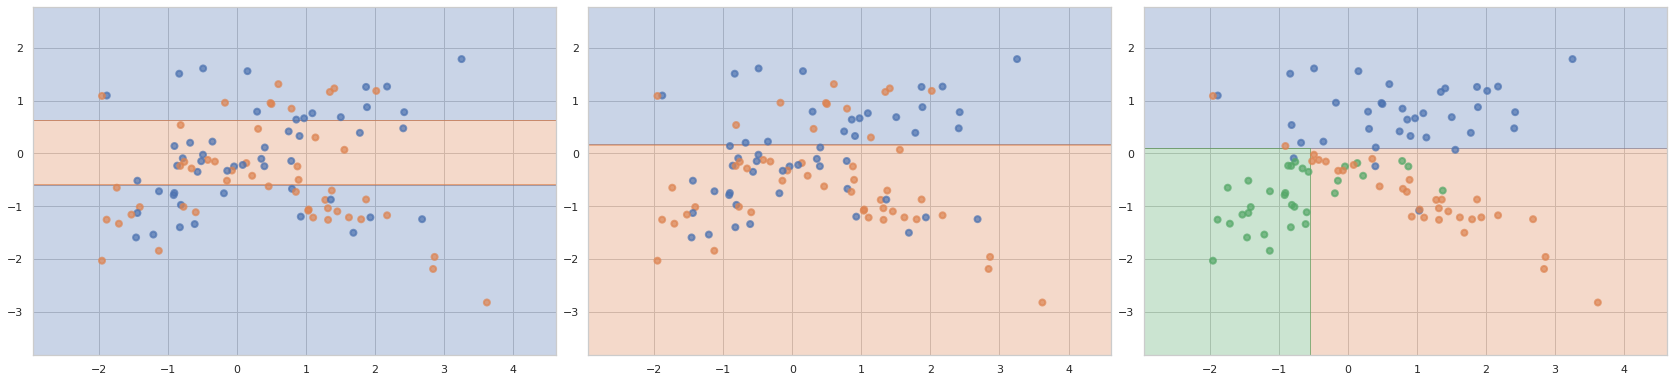

max_depth: 2
min_samples_leaf: 15 

num of dataset: 1
train accuracy: 0.7875
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



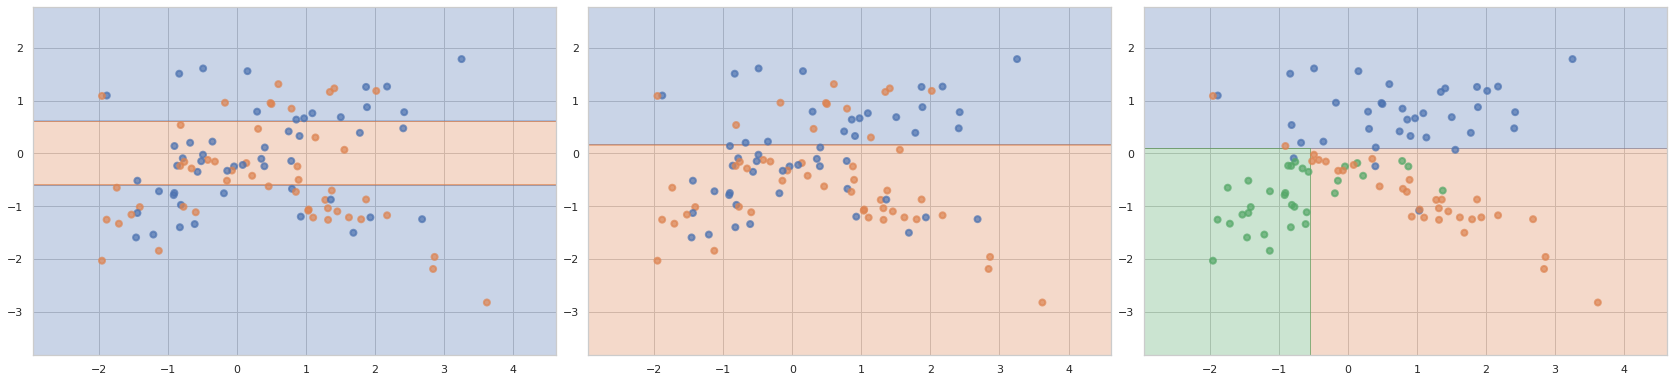

max_depth: 4
min_samples_leaf: 1 

num of dataset: 1
train accuracy: 0.9625
test accuracy: 0.75 

num of dataset: 2
train accuracy: 0.9875
test accuracy: 0.95 

num of dataset: 3
train accuracy: 0.9125
test accuracy: 0.7 



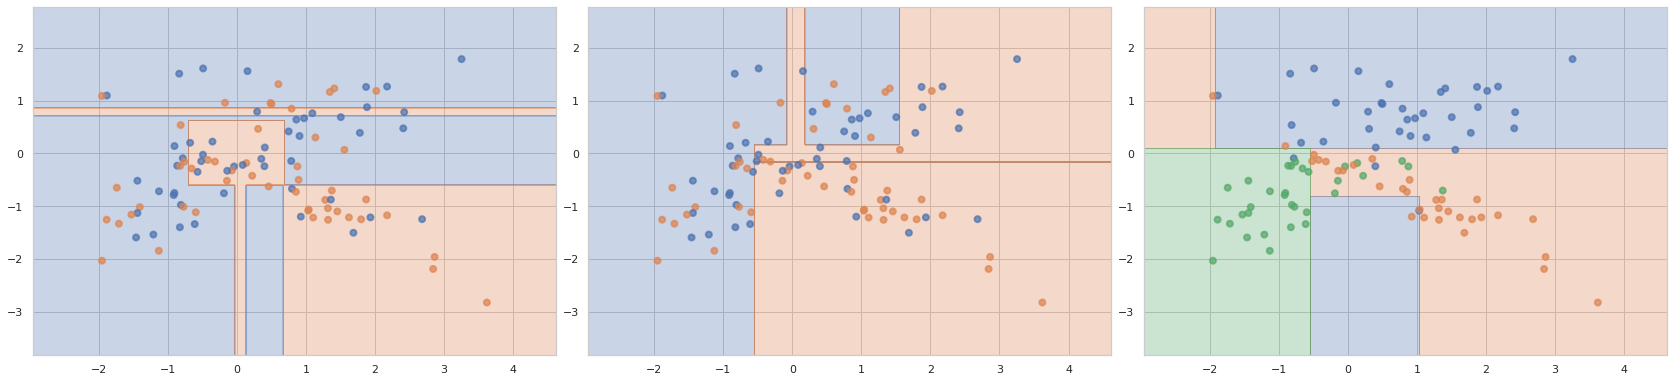

max_depth: 4
min_samples_leaf: 5 

num of dataset: 1
train accuracy: 0.9125
test accuracy: 0.85 

num of dataset: 2
train accuracy: 0.95
test accuracy: 0.8 

num of dataset: 3
train accuracy: 0.9
test accuracy: 0.7 



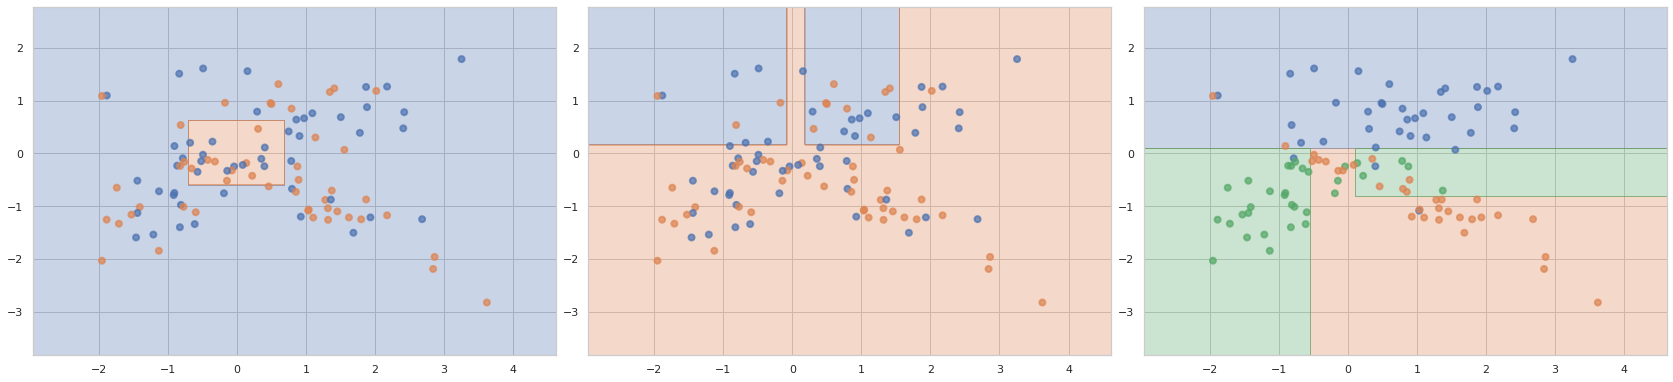

max_depth: 4
min_samples_leaf: 10 

num of dataset: 1
train accuracy: 0.825
test accuracy: 0.9 

num of dataset: 2
train accuracy: 0.8375
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



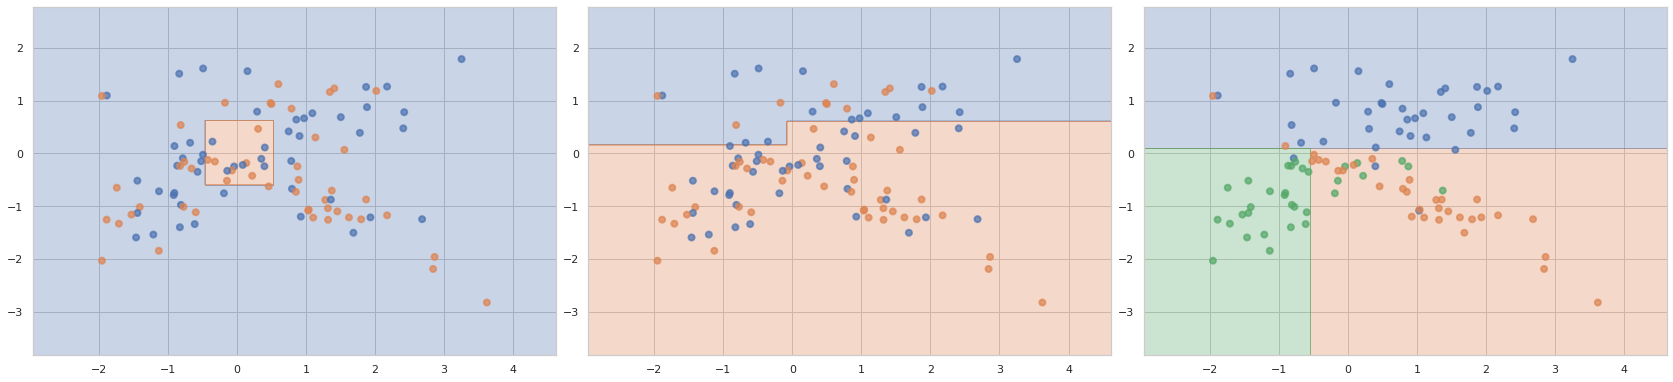

max_depth: 4
min_samples_leaf: 15 

num of dataset: 1
train accuracy: 0.7875
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



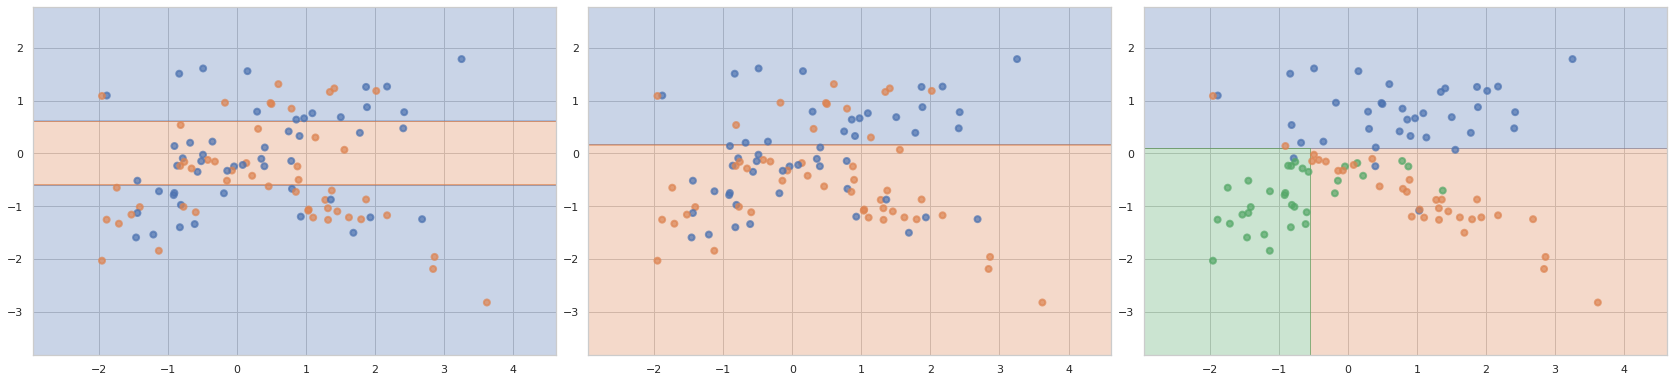

max_depth: 6
min_samples_leaf: 1 

num of dataset: 1
train accuracy: 1.0
test accuracy: 0.65 

num of dataset: 2
train accuracy: 1.0
test accuracy: 0.95 

num of dataset: 3
train accuracy: 0.95
test accuracy: 0.65 



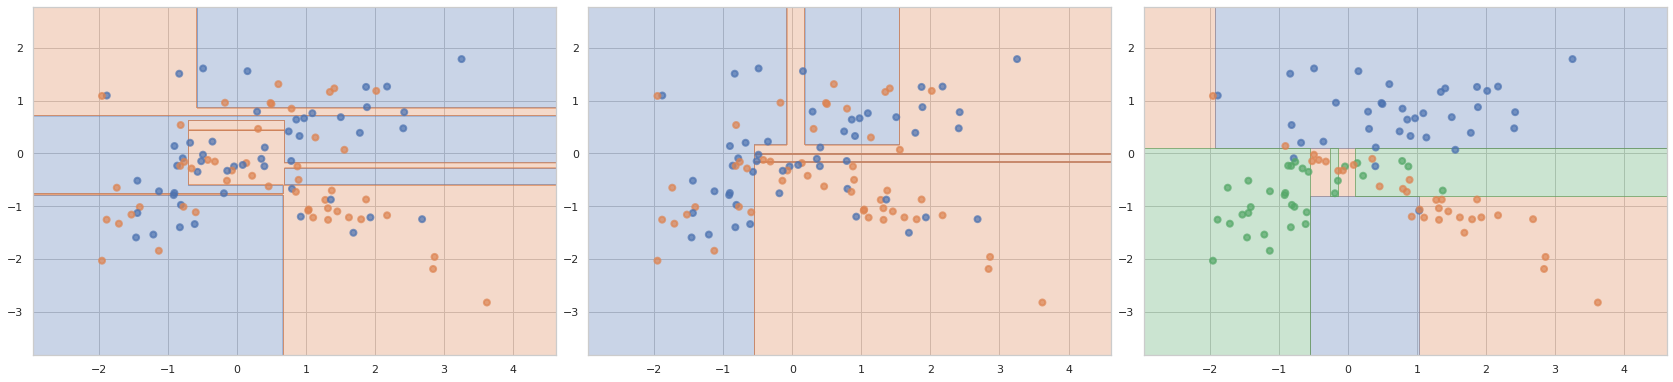

max_depth: 6
min_samples_leaf: 5 

num of dataset: 1
train accuracy: 0.9125
test accuracy: 0.85 

num of dataset: 2
train accuracy: 0.95
test accuracy: 0.8 

num of dataset: 3
train accuracy: 0.9
test accuracy: 0.7 



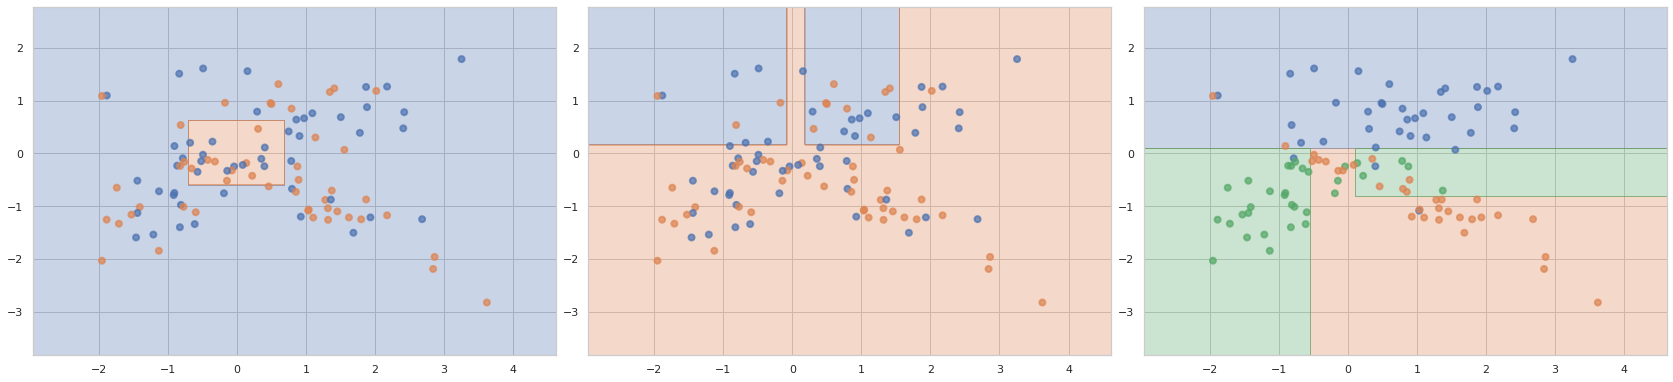

max_depth: 6
min_samples_leaf: 10 

num of dataset: 1
train accuracy: 0.825
test accuracy: 0.9 

num of dataset: 2
train accuracy: 0.8375
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



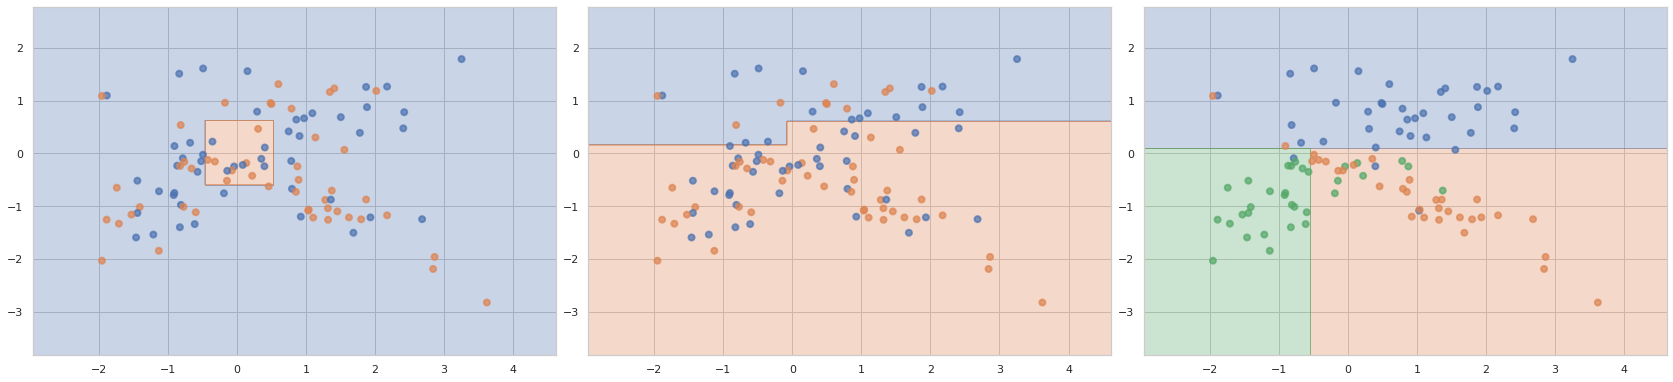

max_depth: 6
min_samples_leaf: 15 

num of dataset: 1
train accuracy: 0.7875
test accuracy: 0.65 

num of dataset: 2
train accuracy: 0.825
test accuracy: 0.85 

num of dataset: 3
train accuracy: 0.8875
test accuracy: 0.75 



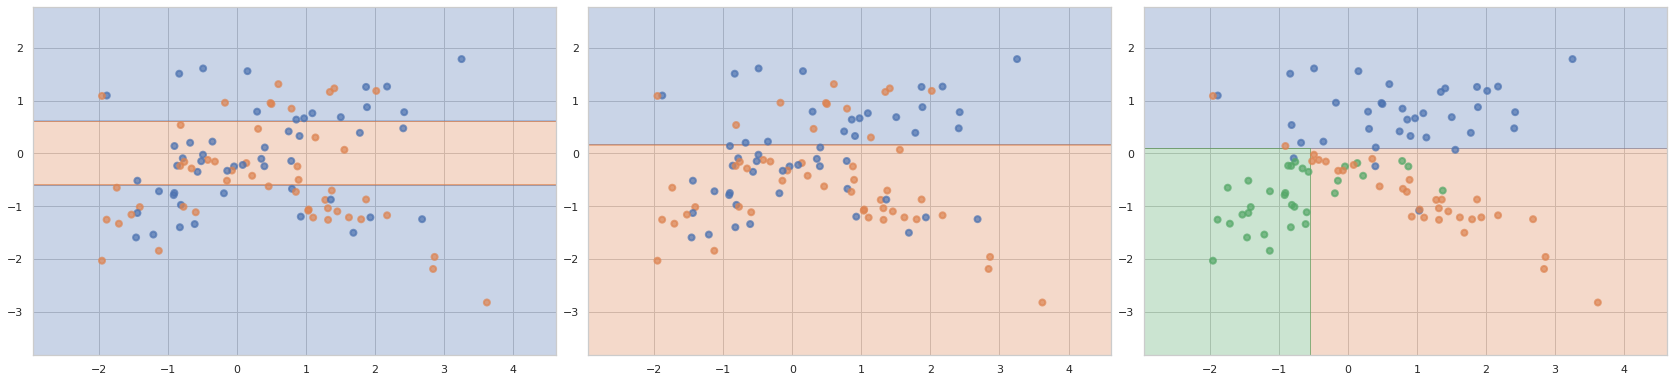

In [55]:
dephs_ = [None, 2, 4, 6]
sl_ = [1, 5, 10, 15]
for j, max_depth_now in enumerate(dephs_):
    for k, min_samples_leaf_now in enumerate(sl_):
        plt.figure(figsize=(24, 6))
        print('max_depth:', max_depth_now)
        print('min_samples_leaf:', min_samples_leaf_now, '\n')
        for i, (x, y) in enumerate(datasets):
            X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
            tr  = DecisionTreeClassifier(max_depth=max_depth_now, min_samples_leaf=min_samples_leaf_now).fit(X_train, y_train)
            plt.subplot(1, 3, i + 1)
            plot_surface(tr, X, y)

            print('num of dataset:', i + 1)
            print('train accuracy:', accuracy_score(y_train, tr.predict(X_train)))
            print('test accuracy:', accuracy_score(y_test, tr.predict(X_test)), '\n')
        plt.show()

__Ответ:__ уменьшениие min_samples_leaf приводит к переобучению, и по разделяющей плоскости видно, что алгоритм подстраивается под трейн. Это происходит, так как min_samples_leaf – минимальное число объектов в листе, а значит, чем оно меньше, тем сильнее модель может подогнаться под трейн.

Также увеличение max_depth приводит к переобучению, так как увеличивается количество листьев, что дает модели подстроится под трейн. 

На примере всех датасетов это выполняется одинаково.

При рассмотрении одного из гиперпараметров можно проследить закономерность. Например, при увеличении min_samples_leaf падает accuracy на трейне и увеличивается на тесте.

# 2. Решающие деревья своими руками

В этой части вам нужно реализовать свой класс для обучения решающего дерева в задаче бинарной классификации с возможностью обработки вещественных и категориальных признаков.

__Задание 3. (1.5 балл)__

Реализуйте функцию find_best_split из модуля hw5code.py

ID успешной посылки: 77404190 [cсылка](https://contest.yandex.ru/contest/43413/run-report/77404190/) 

Ник в контесте: evg.antonova.1

__Задание 4. (0.5 балла)__

Загрузите таблицу [students.csv](https://github.com/esokolov/ml-course-hse/blob/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv) (это немного преобразованный датасет [User Knowledge](https://archive.ics.uci.edu/ml/datasets/User+Knowledge+Modeling)). В ней признаки объекта записаны в первых пяти столбцах, а в последнем записана целевая переменная (класс: 0 или 1). Постройте на одном изображении пять кривых "порог — значение критерия Джини" для всех пяти признаков. Отдельно визуализируйте scatter-графики "значение признака — класс" для всех пяти признаков.

In [56]:
from hw5code import find_best_split, DecisionTree

In [57]:
!wget https://github.com/esokolov/ml-course-hse/raw/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv

data = pd.read_csv('students.csv')
data

--2022-11-30 18:46:27--  https://github.com/esokolov/ml-course-hse/raw/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv [following]
--2022-11-30 18:46:27--  https://raw.githubusercontent.com/esokolov/ml-course-hse/master/2022-fall/homeworks-practice/homework-practice-05-trees/students.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 7249 (7.1K) [text/plain]
Saving to: ‘students.csv.3’

students.csv.3      100%[===========

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,0
1,0.08,0.08,0.10,0.24,0.90,1
2,0.06,0.06,0.05,0.25,0.33,0
3,0.10,0.10,0.15,0.65,0.30,1
4,0.08,0.08,0.08,0.98,0.24,0
...,...,...,...,...,...,...
253,0.61,0.78,0.69,0.92,0.58,1
254,0.78,0.61,0.71,0.19,0.60,1
255,0.54,0.82,0.71,0.29,0.77,1
256,0.50,0.75,0.81,0.61,0.26,1


In [58]:
X = data.drop('UNS', axis=1)
y = data['UNS']

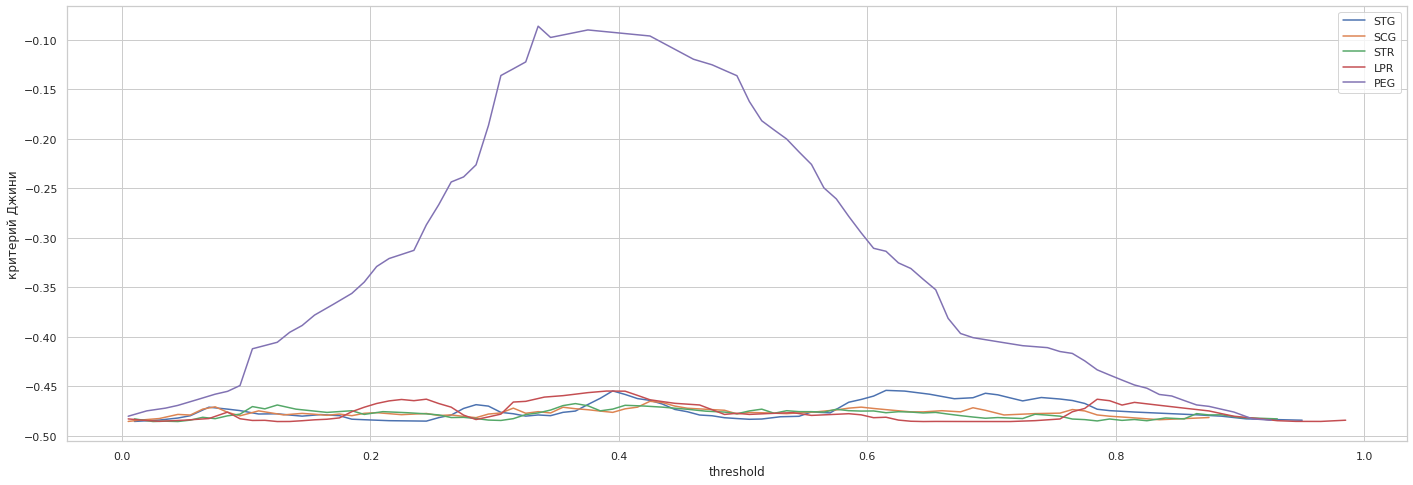

In [59]:
fig, ax = plt.subplots(figsize=(24, 8))

for feature in (['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    thresholds, ginis, threshold_best, gini_best = find_best_split(X[feature].to_numpy(), y.to_numpy())
    ax.plot(thresholds, ginis, label=feature)

ax.set(xlabel='threshold', ylabel='критерий Джини')
ax.legend()
plt.show()

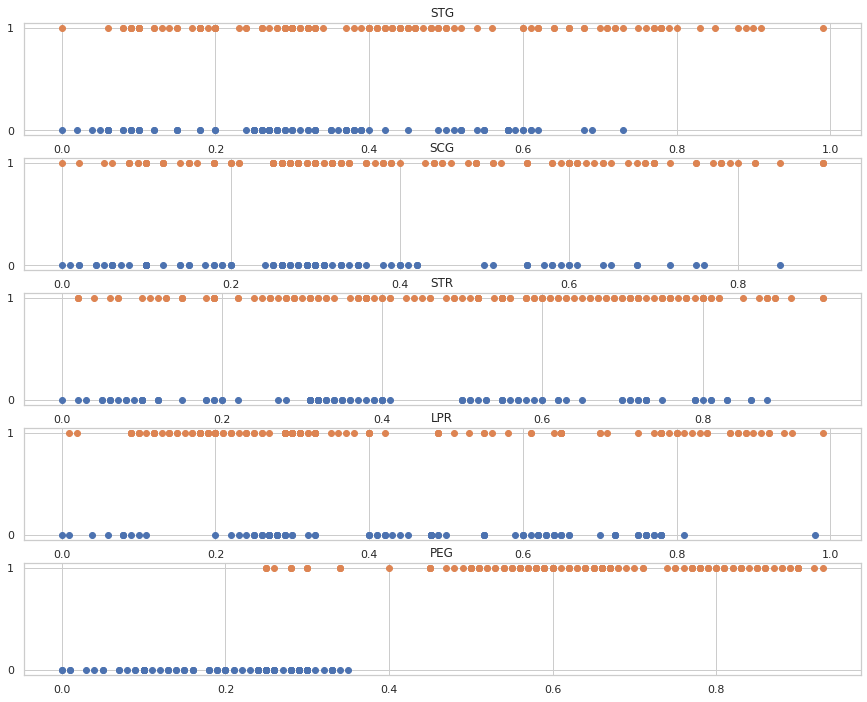

In [60]:
fig, ax = plt.subplots(5, 1, figsize=(15,12))

for i, feature in enumerate(['STG', 'SCG', 'STR', 'LPR', 'PEG']):
    ax[i].scatter(X[y == 0][feature], y[y == 0])
    ax[i].scatter(X[y == 1][feature], y[y == 1])
    ax[i].set(title=feature)
    ax[i].yaxis.set_ticks([0, 1])

plt.show()

__Задание 5. (0.5 балла)__

Исходя из кривых значений критерия Джини, по какому признаку нужно производить деление выборки на два поддерева? Согласуется ли этот результат с визуальной оценкой scatter-графиков? Как бы охарактеризовали вид кривой для "хороших" признаков, по которым выборка делится почти идеально? Чем отличаются кривые для признаков, по которым деление практически невозможно?

**Ответ:** по кривым видно, что наилучшим признаком для разбиения является PEG, так как на этой кривой явно выражен максимум, и данная кривая сначала монотонно возрастает, а потом убывает, чего нет у остальных кривых.

По scatter-графикам также наилучшим показателем выступает PEG, потому что на его графике можно четко разделить выборку, а на остальных графиках интервалы классов сильно пересекаются.

__Задание 6. (1.5 балла).__

Разберитесь с уже написанным кодом в классе DecisionTree модуля hw5code.py. Найдите ошибки в реализации метода \_fit_node. Напишите функцию \_predict_node.

 Построение дерева осуществляется согласно базовому жадному алгоритму, предложенному в [лекции](https://github.com/esokolov/ml-course-hse/blob/master/2020-fall/lecture-notes/lecture07-trees.pdf) в разделе «Построение дерева». Выбор лучшего разбиения необходимо производить по критерию Джини. Критерий останова: все объекты в листе относятся к одному классу или ни по одному признаку нельзя разбить выборку. Ответ в листе: наиболее часто встречающийся класс в листе. Для категориальных признаков выполняется преобразование, описанное в лекции в разделе «Учет категориальных признаков».

ID успешной посылки: 77405428 [cсылка](https://contest.yandex.ru/contest/43413/run-report/77405428/) 

Ник в контесте: evg.antonova.1

__Задание 7. (0.5 балла)__

Протестируйте свое решающее дерево на датасете [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom). Вам нужно скачать таблицу agaricus-lepiota.data (из [Data Folder](https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/)), прочитать ее с помощью pandas, применить к каждому столбцу LabelEncoder (из sklearn), чтобы преобразовать строковые имена категорий в натуральные числа. Первый столбец — это целевая переменная (e — edible, p — poisonous) Мы будем измерять качество с помощью accuracy, так что нам не очень важно, что будет классом 1, а что — классом 0. Обучите решающее дерево на половине случайно выбранных объектов (признаки в датасете категориальные) и сделайте предсказания для оставшейся половины. Вычислите accuracy.

У вас должно получиться значение accuracy, равное единице (или очень близкое к единице), и не очень глубокое дерево.

In [61]:
from sklearn.preprocessing import LabelEncoder

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data

mushrooms = pd.read_csv('agaricus-lepiota.data')
mushrooms

--2022-11-30 18:46:29--  https://archive.ics.uci.edu/ml/machine-learning-databases/mushroom/agaricus-lepiota.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 373704 (365K) [application/x-httpd-php]
Saving to: ‘agaricus-lepiota.data.3’

agaricus-lepiota.da 100%[===================>] 364.95K  1.80MB/s    in 0.2s    

2022-11-30 18:46:30 (1.80 MB/s) - ‘agaricus-lepiota.data.3’ saved [373704/373704]



,p,x,s,n,t,p.1,f,c,n.1,k,...,s.2,w,w.1,p.2,w.2,o,p.3,k.1,s.3,u
0,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
1,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
2,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
3,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
4,e,x,y,y,t,a,f,c,b,n,...,s,w,w,p,w,o,p,k,n,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8118,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8119,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8120,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8121,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [62]:
X = mushrooms.drop('p', axis=1)
y = mushrooms['p']

In [63]:
le = LabelEncoder()

for column in X.columns:
  X[column] = le.fit_transform(X[column])

y = le.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

tr = DecisionTree(['categorical'] * X.shape[1])
tr.fit(np.array(X_train), np.array(y_train))

In [64]:
print('test accuracy:', accuracy_score(tr.predict(np.array(X_test)), y_test))

test accuracy: 1.0


__Задание 8. (бонус, 1 балл)__

Реализуйте в классе DecisionTree поддержку параметров max_depth, min_samples_split и min_samples_leaf по аналогии с DecisionTreeClassifier. Постройте графики зависимости качества предсказания в зависимости от этих параметров для набора данных tic-tac-toe (см. следующий пункт).

__Задание 9. (2 балла)__

Загрузите следующие наборы данных (напомним, что pandas умеет загружать файлы по url, в нашем случае это файл \*.data), предварительно ознакомившись с описанием признаков и целевой переменной в каждом из них (она записаны в Data Folder, в файле *.names): 
* [mushrooms](https://archive.ics.uci.edu/ml/datasets/Mushroom) (загрузили в предыдущем пункте, классы записаны в нулевом столбце),
* [tic-tac-toe](https://archive.ics.uci.edu/ml/datasets/Tic-Tac-Toe+Endgame) (классы записаны в последнем столбце)
* [cars](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) (классы записаны в последнем столбце, считаем что unacc, acc — это класс 0, good, vgood — класс 1)
* [nursery](https://archive.ics.uci.edu/ml/datasets/Nursery) (классы записаны в последнем столбце, считаем, что not_recom и recommend — класс 0, very_recom, priority, spec_prior — класс 1).

Закодируйте категориальные признаки, использовав LabelEncoder. С помощью cross_val_score (cv=10) оцените accuracy на каждом из этих наборов данных следующих алгоритмов:
* DecisionTree, считающий все признаки вещественными
* DecisionTree, считающий все признаки категориальными
* DecisionTree, считающий все признаки вещественными + one-hot-encoding всех признаков
* DecisionTreeClassifier из sklearn. Запишите результат в pd.DataFrame (по строкам — наборы данных, по столбцам — алгоритмы).

Рекомендации:
* Чтобы cross_val_score вычисляла точность, нужно передать scoring=make_scorer(accuracy_score), обе фукнции из sklearn.metrics.
* Если вам позволяет память (а она скорее всего позволяет), указывайте параметр sparse=False в OneHotEncoder (если вы, конечно, используете его). Иначе вам придется добиваться того, чтобы ваша реализация дерева умела работать с разреженными матрицами (что тоже, в целом, не очень сложно).

In [65]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import KFold
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(sparse=False)

!wget https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/nursery/nursery.data

--2022-11-30 18:46:30--  https://archive.ics.uci.edu/ml/machine-learning-databases/tic-tac-toe/tic-tac-toe.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 25866 (25K) [application/x-httpd-php]
Saving to: ‘tic-tac-toe.data.8’

tic-tac-toe.data.8  100%[===================>]  25.26K  --.-KB/s    in 0.05s   

2022-11-30 18:46:30 (523 KB/s) - ‘tic-tac-toe.data.8’ saved [25866/25866]

--2022-11-30 18:46:31--  https://archive.ics.uci.edu/ml/machine-learning-databases/car/car.data
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... 128.195.10.252
Connecting to archive.ics.uci.edu (archive.ics.uci.edu)|128.195.10.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51867 (51K) [application/x-httpd-php]
Saving to: ‘car.data.8’

car.data.8          100%[===================>]  50.65K  --.-KB/s    in 0

In [66]:
tic_tac = pd.read_csv('tic-tac-toe.data')
cars = pd.read_csv('car.data')
nursery = pd.read_csv('nursery.data')

In [67]:
cars.loc[((cars['unacc'] == 'unacc') | (cars['unacc'] == 'acc')), 'unacc'] = 0
cars.loc[((cars['unacc'] == 'good') | (cars['unacc'] == 'vgood')), 'unacc'] = 1

In [68]:
nursery.loc[((nursery['recommend'] == 'not_recom') | (nursery['recommend'] == 'recommend')), 'recommend'] = 0
nursery.loc[((nursery['recommend'] == 'priority') | (nursery['recommend'] == 'very_recom') | (nursery['recommend'] == 'spec_prior')), 'recommend'] = 1

In [69]:
X_mushrooms = mushrooms.drop('p', axis=1)
y_mushrooms = mushrooms['p']

for column in X_mushrooms.columns:
  X_mushrooms[column] = le.fit_transform(X_mushrooms[column])

y_mushrooms = le.fit_transform(y_mushrooms)

X_tic = tic_tac.drop('positive', axis=1)
y_tic = tic_tac['positive']

for column in X_tic.columns:
  X_tic[column] = le.fit_transform(X_tic[column])

y_tic = le.fit_transform(y_tic)

X_cars = cars.drop('unacc', axis=1)
y_cars = cars['unacc']

for column in X_cars.columns:
  X_cars[column] = le.fit_transform(X_cars[column])

y_cars = le.fit_transform(y_cars)

X_nursery = nursery.drop('recommend', axis=1)
y_nursery = nursery['recommend']

for column in X_nursery.columns:
  X_nursery[column] = le.fit_transform(X_nursery[column])

y_nursery = le.fit_transform(y_nursery)

In [70]:
results = pd.DataFrame(columns=['real', 'categorical', 'real+ohe', 'DecisionTreeClassifier'])

In [71]:
tr = DecisionTree(['real'] * X_mushrooms.shape[1])
acc_mushrooms_1 = np.mean(cross_val_score(tr, X = np.array(X_mushrooms), y = np.array(y_mushrooms), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTree(['categorical'] * X_mushrooms.shape[1])
acc_mushrooms_2 = np.mean(cross_val_score(tr, X = np.array(X_mushrooms), y = np.array(y_mushrooms), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

X_mushrooms_ohe = ohe.fit_transform(X_mushrooms)
tr = DecisionTree(['real'] * X_mushrooms_ohe.shape[1])
acc_mushrooms_3 = np.mean(cross_val_score(tr, X = np.array(X_mushrooms_ohe), y = np.array(y_mushrooms), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTreeClassifier()
acc_mushrooms_4 = np.mean(cross_val_score(tr, X = np.array(X_mushrooms), y = np.array(y_mushrooms), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

results.loc['mushrooms'] = [
    acc_mushrooms_1,
    acc_mushrooms_2,
    acc_mushrooms_3,
    acc_mushrooms_4
]

In [72]:
tr = DecisionTree(['real'] * X_tic.shape[1])
acc_tic_1 = np.mean(cross_val_score(tr, X = np.array(X_tic), y = np.array(y_tic), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTree(['categorical'] * X_tic.shape[1])
acc_tic_2 = np.mean(cross_val_score(tr, X = np.array(X_tic), y = np.array(y_tic), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

X_tic_ohe = ohe.fit_transform(X_tic)
tr = DecisionTree(['real'] * X_mushrooms_ohe.shape[1])
acc_tic_3 = np.mean(cross_val_score(tr, X = np.array(X_tic_ohe), y = np.array(y_tic), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTreeClassifier()
acc_tic_4 = np.mean(cross_val_score(tr, X = np.array(X_tic), y = np.array(y_tic), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

results.loc['tic-tac-toe'] = [
    acc_tic_1,
    acc_tic_2,
    acc_tic_3,
    acc_tic_4
]

In [73]:
tr = DecisionTree(['real'] * X_cars.shape[1])
acc_cars_1 = np.mean(cross_val_score(tr, X = np.array(X_cars), y = np.array(y_cars), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTree(['categorical'] * X_cars.shape[1])
acc_cars_2 = np.mean(cross_val_score(tr, X = np.array(X_cars), y = np.array(y_cars), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

X_cars_ohe = ohe.fit_transform(X_cars)
tr = DecisionTree(['real'] * X_cars_ohe.shape[1])
acc_cars_3 = np.mean(cross_val_score(tr, X = np.array(X_cars_ohe), y = np.array(y_cars), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTreeClassifier()
acc_cars_4 = np.mean(cross_val_score(tr, X = np.array(X_cars), y = np.array(y_cars), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

results.loc['cars'] = [
    acc_cars_1,
    acc_cars_2,
    acc_cars_3,
    acc_cars_4
]

In [74]:
tr = DecisionTree(['real'] * X_nursery.shape[1])
acc_nursery_1 = np.mean(cross_val_score(tr, X = np.array(X_nursery), y = np.array(y_nursery), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTree(['categorical'] * X_nursery.shape[1])
acc_nursery_2 = np.mean(cross_val_score(tr, X = np.array(X_nursery), y = np.array(y_nursery), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

X_nursery_ohe = ohe.fit_transform(X_nursery)
tr = DecisionTree(['real'] * X_nursery_ohe.shape[1])
acc_nursery_3 = np.mean(cross_val_score(tr, X = np.array(X_nursery_ohe), y = np.array(y_nursery), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

tr = DecisionTreeClassifier()
acc_nursery_4 = np.mean(cross_val_score(tr, X = np.array(X_nursery), y = np.array(y_nursery), cv = KFold(n_splits=10), scoring=make_scorer(accuracy_score)))

results.loc['nursery'] = [
    acc_nursery_1,
    acc_nursery_2,
    acc_nursery_3,
    acc_nursery_4
]

In [75]:
results

,real,categorical,real+ohe,DecisionTreeClassifier
mushrooms,0.999261,1.000000,0.999631,0.999261
tic-tac-toe,0.462697,0.549265,0.553520,0.483586
cars,0.942600,0.967519,0.921767,0.939693
nursery,0.999846,0.999923,0.999769,0.999846


__Задание 10. (1 балла)__

Проанализируйте результаты эксперимента. 
Одинаково ли для разных наборов данных ранжируются алгоритмы? 
Порассуждайте, почему так происходит. 

Обратите внимание на значение признаков в разных наборах данных. 
Присутствует ли в результатах какая-то компонента случайности? 
Можно ли повлиять на нее и улушить работу алгоритмов?

**Ответ:** для mushrooms, cars, nursery результаты получились достаточно хорошими во всех экспериментах, но лучшим оказался тот, где признаки считаются категориальными. Тут дерево хорошо работает и справляется с задачей классификации. 

Для tic-tac-toe результаты получились не очень хорошими, причем во всех экспериментах, что говорит о том, что просто эту задачу сложно решить с помощью этих методов.

Про компоненту случайности: она сведена к минимуму, так как мы берем среднее через кросс-валидацию. 

С OneHotEncoding код работал довольно долго, а результаты с ним не лучшие.

Среди датасетов mushrooms, cars, nursery худшие результаты получились для cars. Можно заметить, что в этих данных присутствует странное распределение целевой переменной, поэтому возможно данный метод решения этой задачи не подходит для него, но точно сказать сложно. Тут также бы неплохо справилось и константное предсказание.

Вставьте что угодно, описывающее ваши впечатления от этого задания: